# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from citipy import citipy
from datetime import datetime
import time

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Define URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"city": city, 
                          "lat": city_lat, 
                          "lng": city_lng, 
                          "max_Temp": city_max_temp,
                          "humidity": city_humidity,
                          "cloudiness": city_clouds,
                          "wind_Speed": city_wind,
                          "country": city_country,
                          "date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | tiruvottiyur
City not found. Skipping...
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | kanye
Processing Record 9 of Set 1 | vila
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | micheweni
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | xunchang
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | billingham
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

city          567
lat           567
lng           567
max_Temp      567
humidity      567
cloudiness    567
wind_Speed    567
country       567
date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
0,kapaa,22.0752,-159.3190,78.78,86,100,14.97,US,2023-04-04 22:10:09
1,tura,25.5198,90.2201,67.10,89,44,4.74,IN,2023-04-04 22:10:10
2,kaitangata,-46.2817,169.8464,56.93,81,92,6.73,NZ,2023-04-04 22:10:10
3,butaritari,3.0707,172.7902,81.99,81,88,16.31,KI,2023-04-04 22:10:10
4,dikson,73.5069,80.5464,-1.89,95,100,16.33,RU,2023-04-04 22:10:11
5,hilo,19.7297,-155.0900,77.95,79,100,12.66,US,2023-04-04 22:05:45
6,kanye,-24.9667,25.3327,60.39,22,0,6.64,BW,2023-04-04 22:10:11
7,vila,42.0304,-8.1588,50.88,58,2,4.79,PT,2023-04-04 22:10:11
8,rikitea,-23.1203,-134.9692,79.75,77,86,12.37,PF,2023-04-04 22:10:13
9,ushuaia,-54.8000,-68.3000,53.26,43,75,10.36,AR,2023-04-04 22:10:13


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,78.78,86,100,14.97,US,2023-04-04 22:10:09
1,tura,25.5198,90.2201,67.10,89,44,4.74,IN,2023-04-04 22:10:10
2,kaitangata,-46.2817,169.8464,56.93,81,92,6.73,NZ,2023-04-04 22:10:10
3,butaritari,3.0707,172.7902,81.99,81,88,16.31,KI,2023-04-04 22:10:10
4,dikson,73.5069,80.5464,-1.89,95,100,16.33,RU,2023-04-04 22:10:11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
#  Create fields needed for plotting
lats = city_data_df["lat"]
max_temps = city_data_df["max_Temp"]
humidity = city_data_df["humidity"]
cloudiness = city_data_df["cloudiness"]
wind_speed = city_data_df["wind_Speed"]

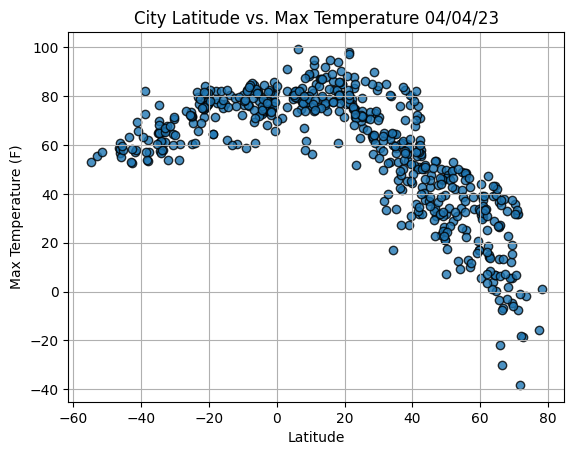

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

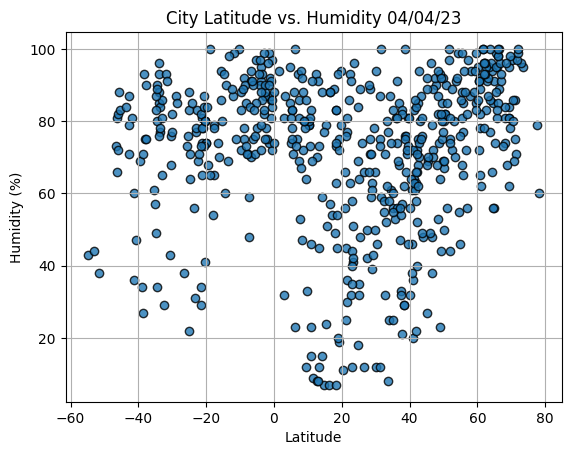

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

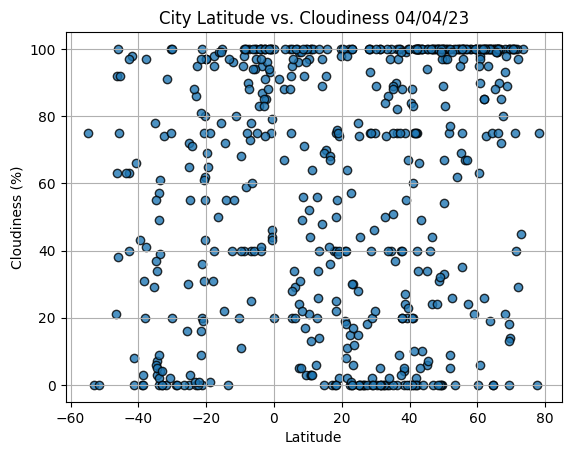

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

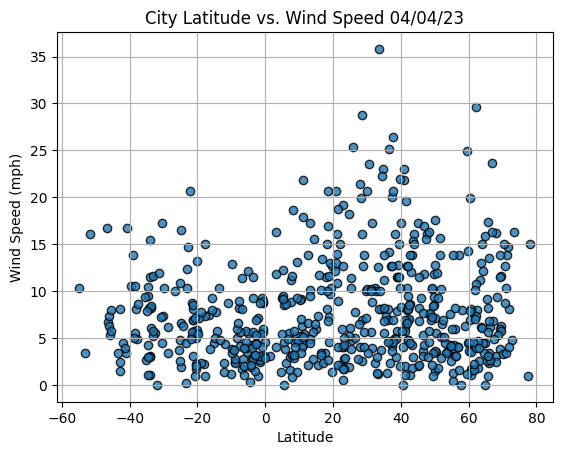

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["lat"] >= 0)] 

# Display sample data
northern_hemi_df.head()

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,78.78,86,100,14.97,US,2023-04-04 22:10:09
1,tura,25.5198,90.2201,67.10,89,44,4.74,IN,2023-04-04 22:10:10
3,butaritari,3.0707,172.7902,81.99,81,88,16.31,KI,2023-04-04 22:10:10
4,dikson,73.5069,80.5464,-1.89,95,100,16.33,RU,2023-04-04 22:10:11
5,hilo,19.7297,-155.0900,77.95,79,100,12.66,US,2023-04-04 22:05:45


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
City_ID,,,,,,,,,
2,kaitangata,-46.2817,169.8464,56.93,81,92,6.73,NZ,2023-04-04 22:10:10
6,kanye,-24.9667,25.3327,60.39,22,0,6.64,BW,2023-04-04 22:10:11
8,rikitea,-23.1203,-134.9692,79.75,77,86,12.37,PF,2023-04-04 22:10:13
9,ushuaia,-54.8000,-68.3000,53.26,43,75,10.36,AR,2023-04-04 22:10:13
10,hithadhoo,-0.6000,73.0833,82.09,72,46,5.68,MV,2023-04-04 22:10:14


###  Temperature vs. Latitude Linear Regression Plot

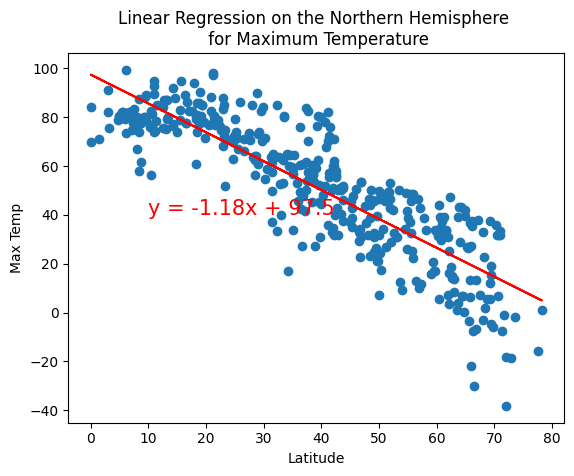

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["max_Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

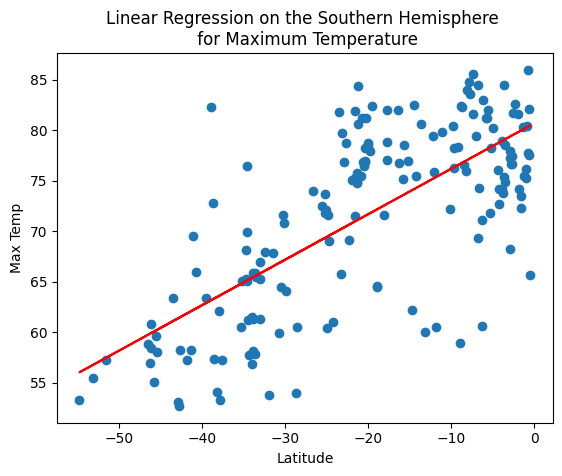

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["max_Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

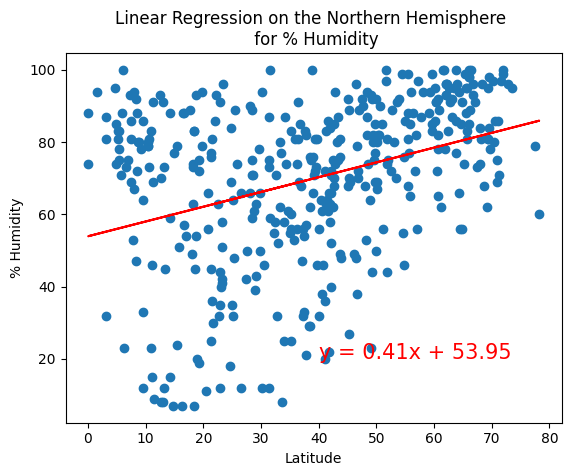

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

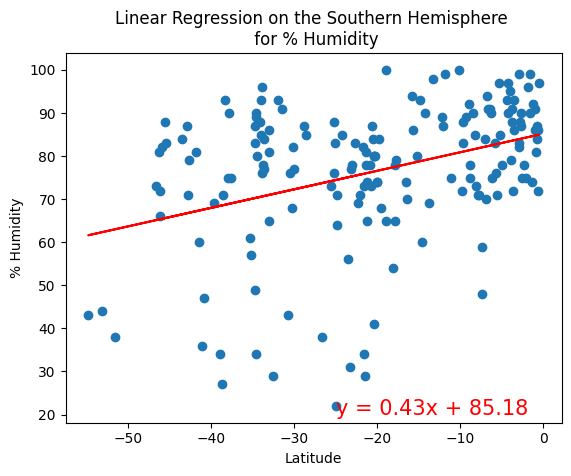

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

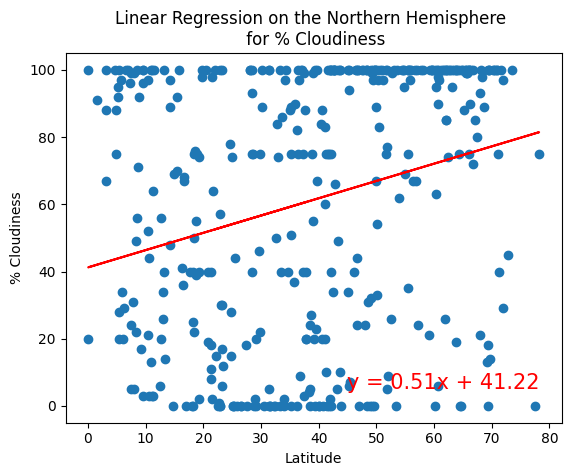

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

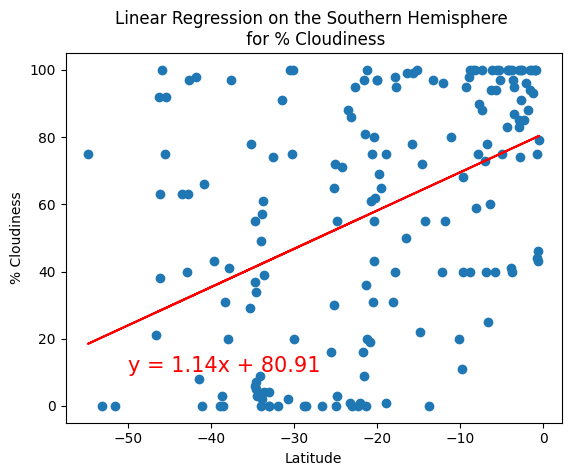

In [22]:
# Southern Hemisphere
## 6.4.4 Linear Regression on the Percent Cloudines for Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

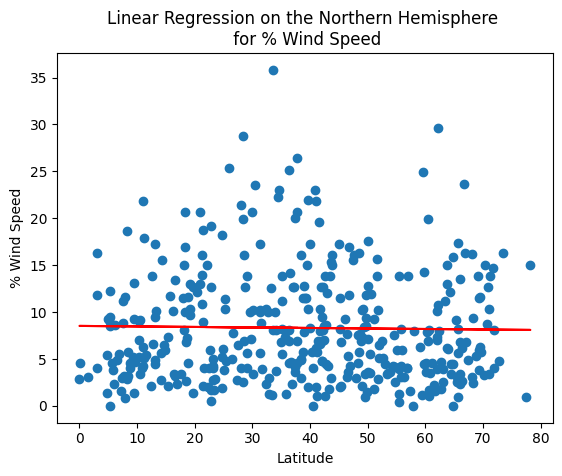

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["wind_Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

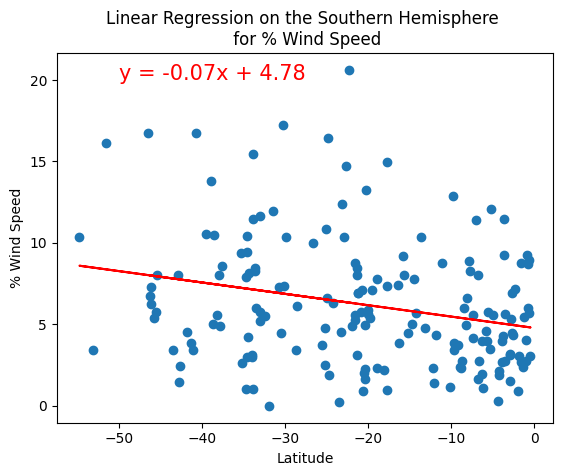

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["wind_Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))